### 1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

In [406]:
df=pd.read_csv("xAPI-Edu-Data.csv")

In [407]:
df.sample(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
114,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,11,2,0,50,No,Bad,Above-7,L
435,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,79,88,79,20,Yes,Good,Above-7,M
268,M,Jordan,Jordan,MiddleSchool,G-06,A,English,F,Father,10,8,10,10,Yes,Bad,Above-7,M
340,F,Iraq,Iraq,lowerlevel,G-02,B,French,F,Father,16,90,15,11,No,Good,Under-7,M
370,M,Jordan,Jordan,lowerlevel,G-02,A,Arabic,F,Father,10,17,50,21,No,Bad,Under-7,M


In [408]:
df.shape

(480, 17)

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [410]:
df.isnull().sum()
## no missing values

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [411]:
df[df.duplicated()]## two duplicate records

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,L
327,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,L


In [412]:
df.drop_duplicates(inplace=True)

In [413]:
df[df.duplicated()] ## now no duplicates

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class


In [414]:
df.describe(include="all")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,478,478,478,478,478,478,478,478,478,478.000000,478.000000,478.000000,478.000000,478,478,478,478
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,303,179,180,248,145,281,95,244,281,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.887029,54.974895,38.014644,43.410042,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.787903,33.035071,26.623507,27.620961,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,20.000000,14.250000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


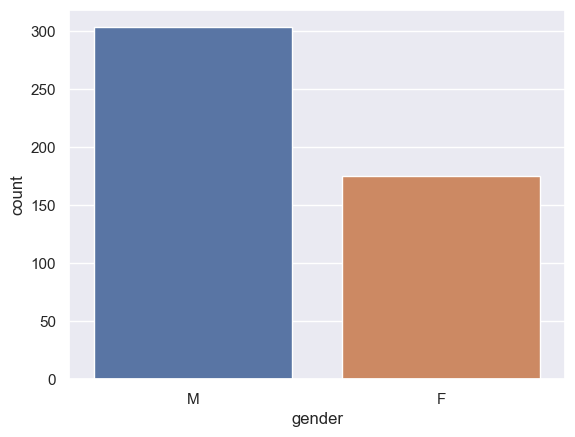

In [415]:
sns.countplot(x="gender", data=df)
plt.show()
## Proportion of male is higher in dataset as compared to females

In [416]:
order_n= df["NationalITy"].value_counts().index

In [417]:
order_n

Index(['KW', 'Jordan', 'Palestine', 'Iraq', 'lebanon', 'Tunis', 'SaudiArabia',
       'Egypt', 'Syria', 'USA', 'Iran', 'Lybia', 'Morocco', 'venzuela'],
      dtype='object')

In [418]:
df.sample()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
141,M,Tunis,Tunis,MiddleSchool,G-07,A,Quran,S,Father,19,65,50,10,No,Bad,Above-7,L


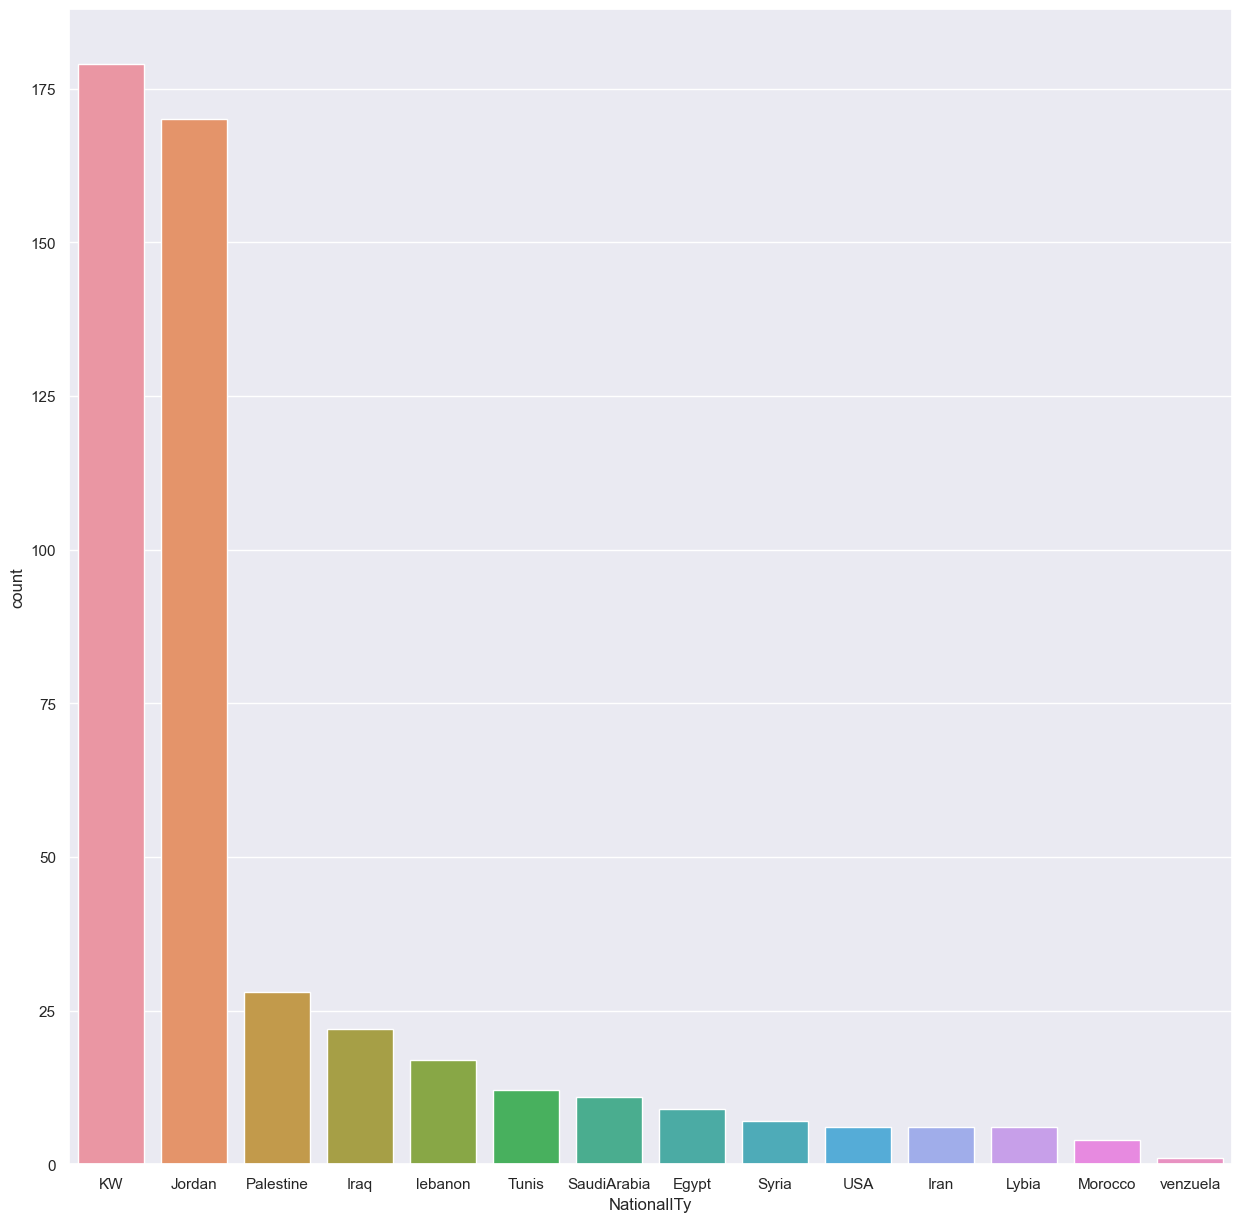

In [419]:
plt.figure(figsize=(15,15))
sns.countplot(x="NationalITy", data=df, order=order_n)
plt.show()
## Students from KW and Jordan are in higher proportion as compared to other nationalities

In [420]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [421]:
order_p= df["PlaceofBirth"].value_counts().index

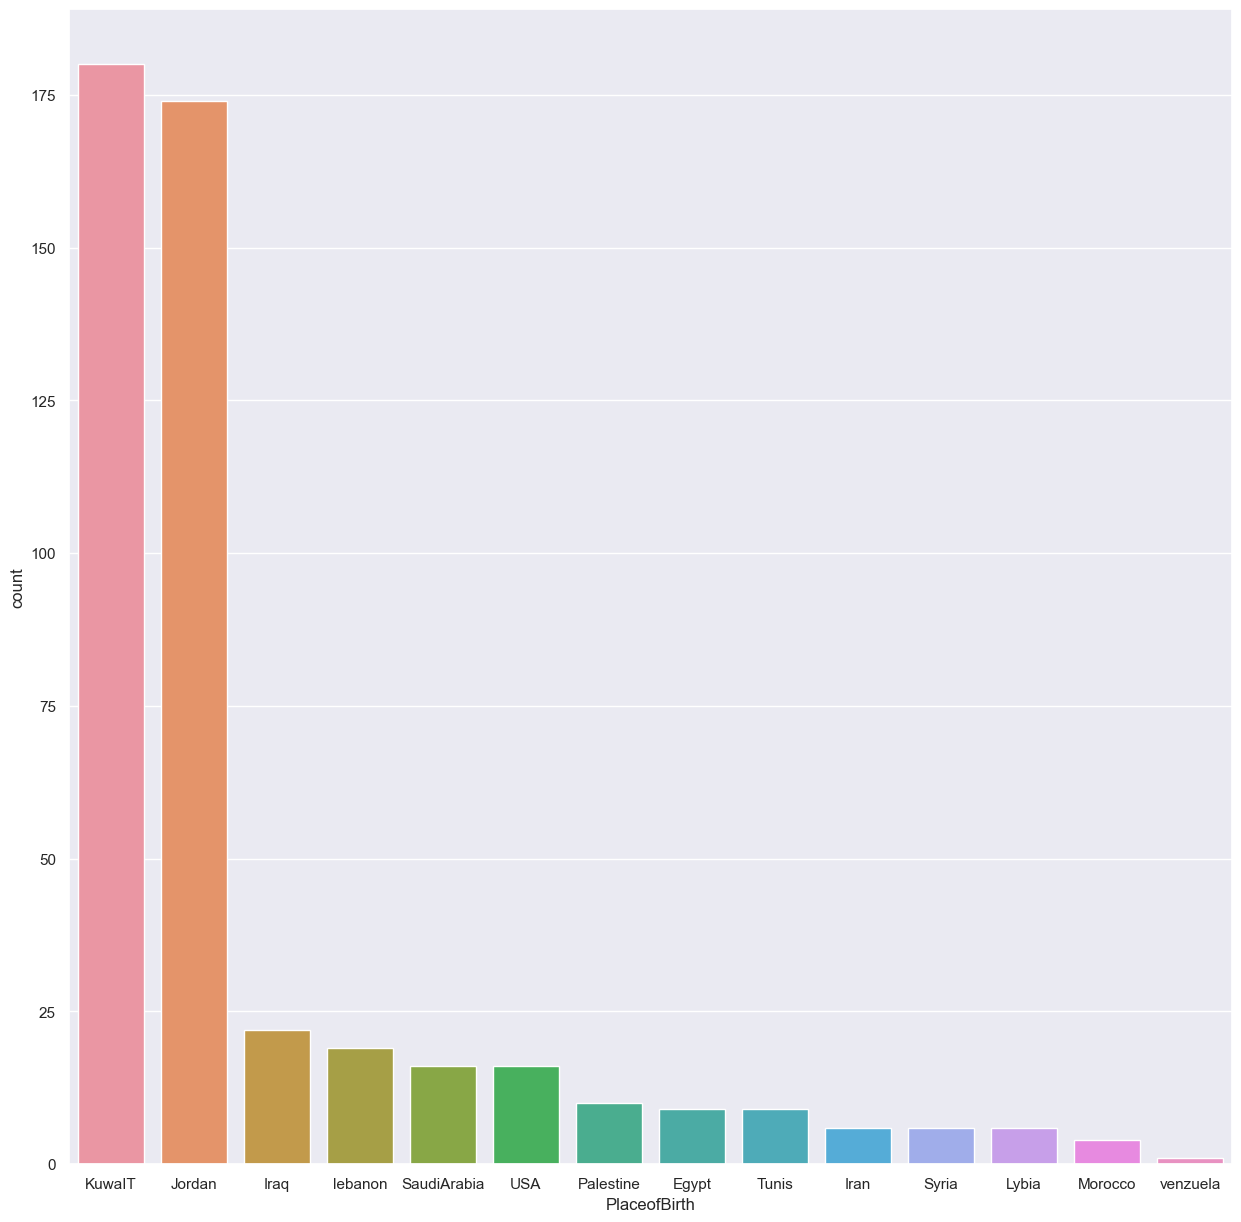

In [422]:
plt.figure(figsize=(15,15))
sns.countplot(x="PlaceofBirth", data=df, order=order_p)
plt.show()
## Similar result as that of nationality

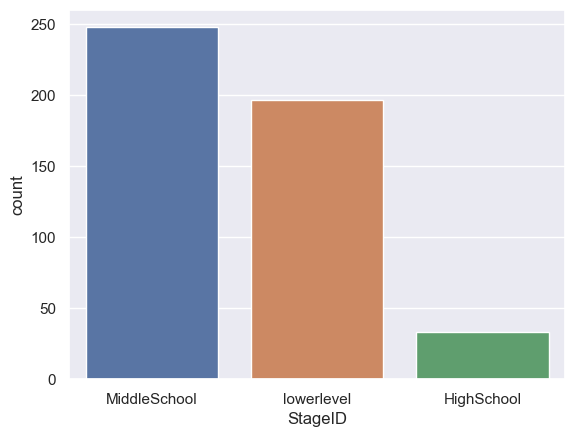

In [423]:
sns.countplot(x="StageID", data=df, order=df["StageID"].value_counts().index)
plt.show()
## Higher number of students are middle school followed by lower level. Very few students are high school

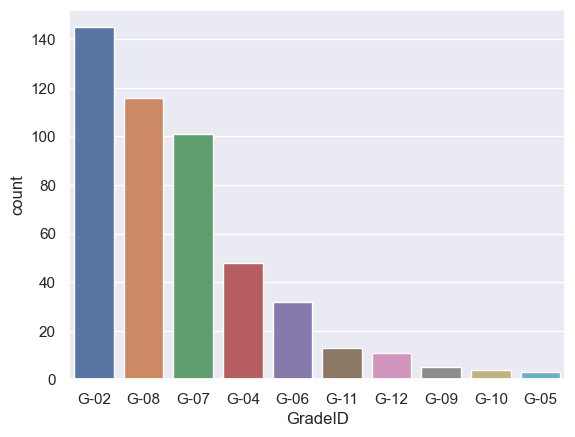

In [424]:
sns.countplot(x="GradeID", data=df, order=df["GradeID"].value_counts().index)
plt.show()
## Majority of the students have scored G-02, G-08, G-07 grades followed by G-04 and G-06

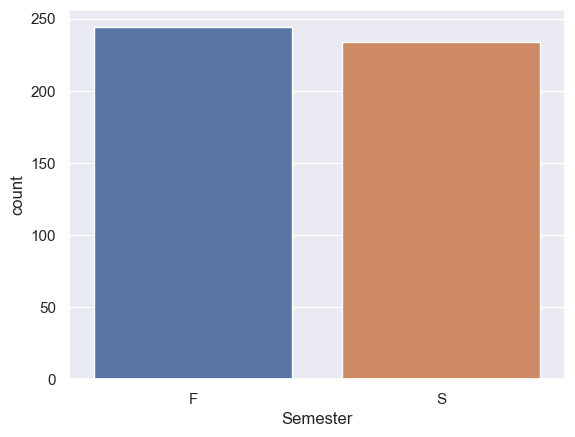

In [425]:
sns.countplot(x="Semester", data=df, order=df["Semester"].value_counts().index)
plt.show()
## It seems data is almost equualy distributed between two semesters

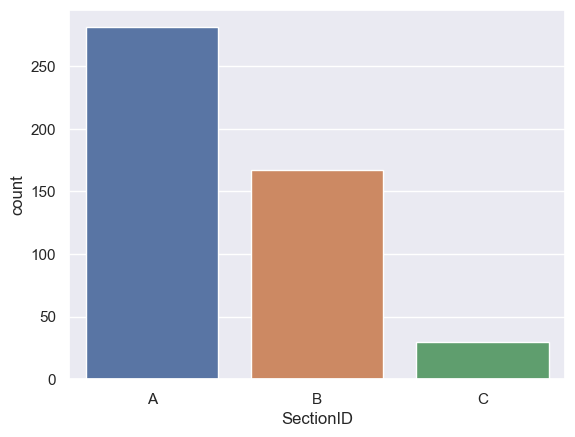

In [426]:
sns.countplot(x="SectionID", data=df, order=df["SectionID"].value_counts().index)
plt.show()
## Mostly students are from Section A and Section B

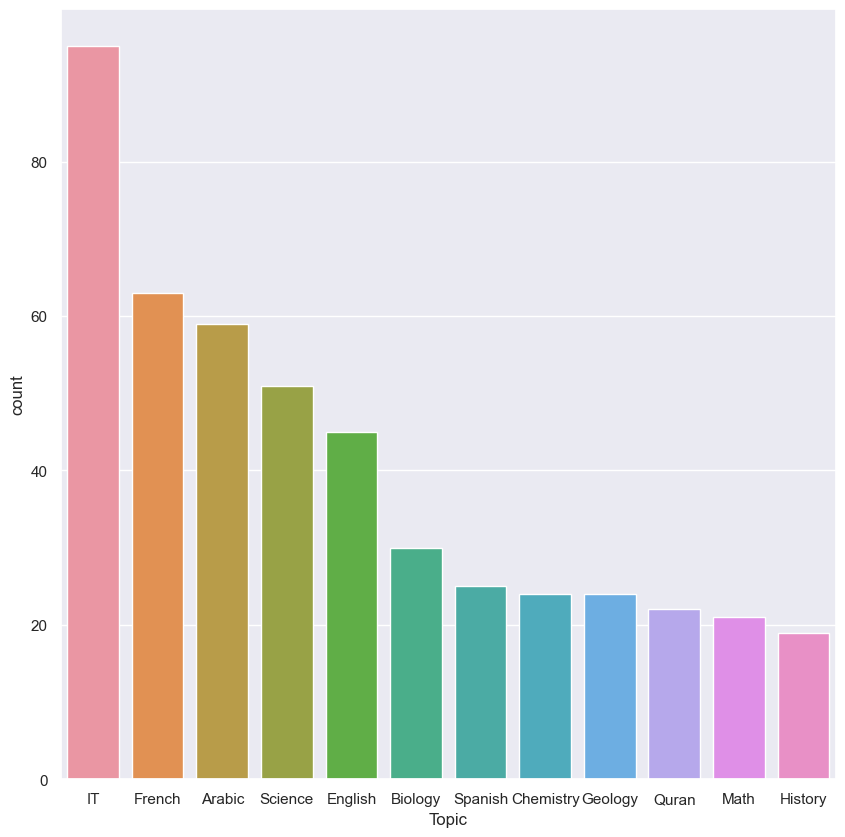

In [427]:
plt.figure(figsize=(10,10))
sns.countplot(x="Topic", data=df, order=df["Topic"].value_counts().index)
plt.show()

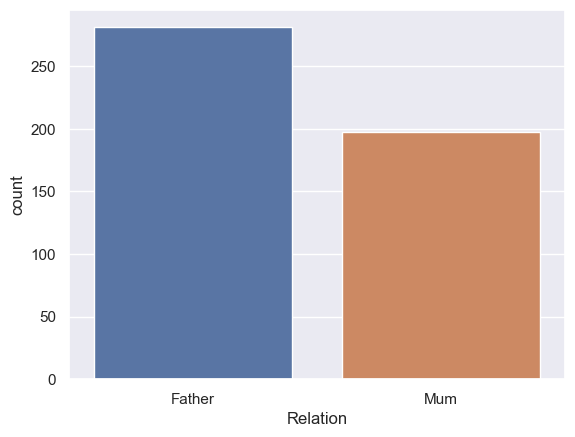

In [428]:
sns.countplot(x="Relation", data=df, order=df["Relation"].value_counts().index)
plt.show()

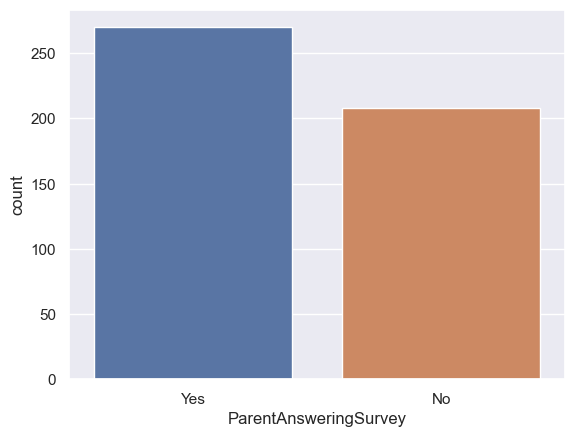

In [429]:
sns.countplot(x="ParentAnsweringSurvey", data=df, order=df["ParentAnsweringSurvey"].value_counts().index)
plt.show()

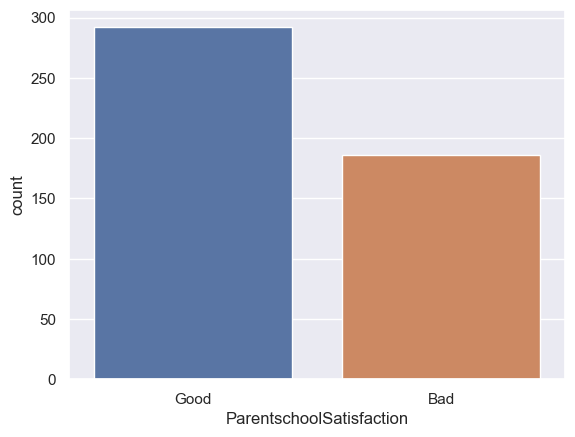

In [430]:
sns.countplot(x="ParentschoolSatisfaction", data=df, order=df["ParentschoolSatisfaction"].value_counts().index)
plt.show()

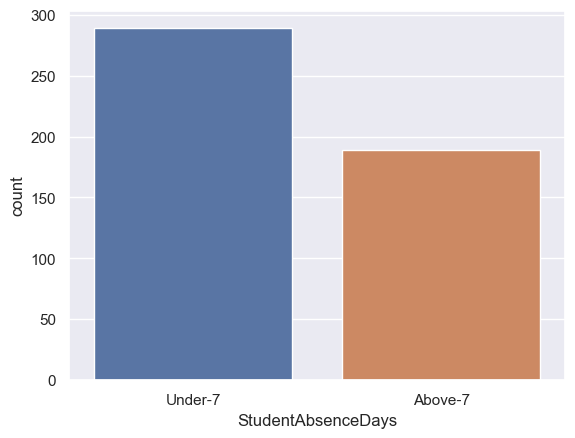

In [431]:
sns.countplot(x="StudentAbsenceDays", data=df, order=df["StudentAbsenceDays"].value_counts().index)
plt.show()

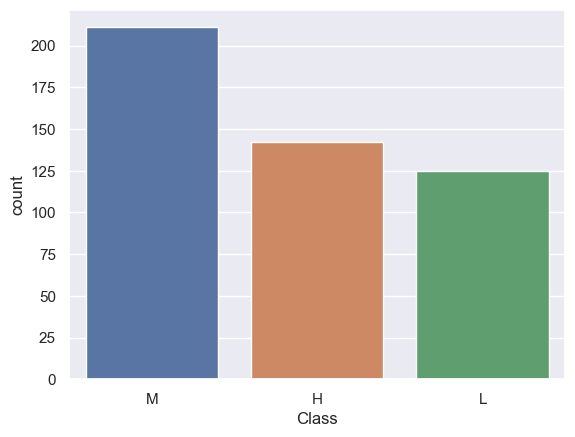

In [432]:
sns.countplot(x="Class", data=df, order=df["Class"].value_counts().index)
plt.show()

### 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

In [433]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

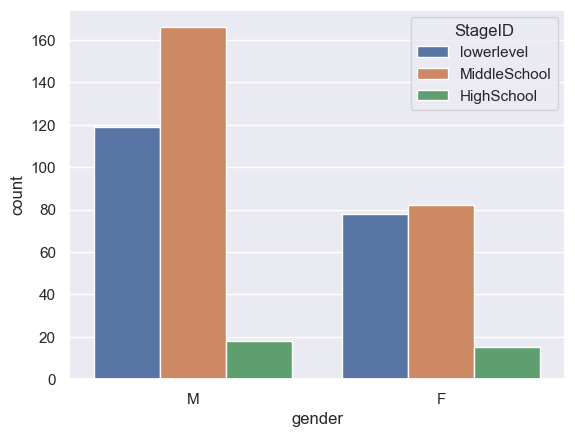

In [434]:
sns.countplot(x="gender",hue="StageID", data=df)
plt.show()

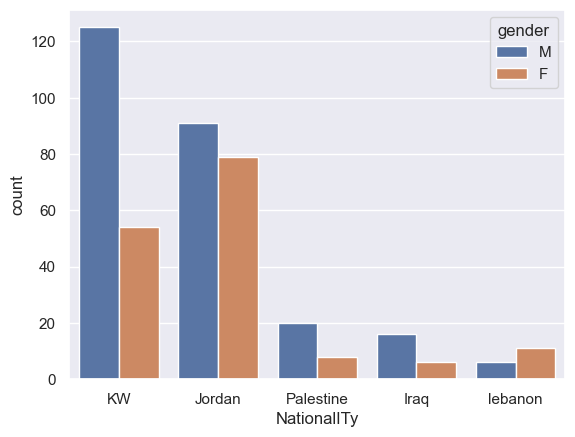

In [435]:
sns.countplot(x="NationalITy", hue="gender", data=df, order=df["NationalITy"].value_counts().index[0:5])
plt.show()
# showing gender distribution for top by 5 countries
## It shows KW has higher number of males as compared to females whereas Jordan has almost equal distribution of 
## males and females

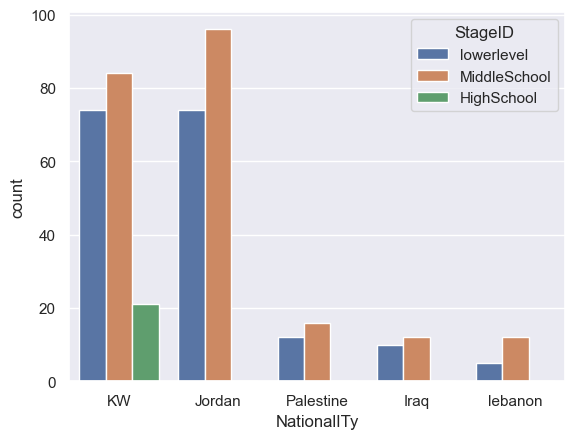

In [436]:
sns.countplot(x="NationalITy", hue="StageID", data=df, order=df["NationalITy"].value_counts().index[0:5])
plt.show()
## Showing StageID distribution for top by 5 countries
## From top 5 countries(by distribution of data), High school students are only from KW nationality

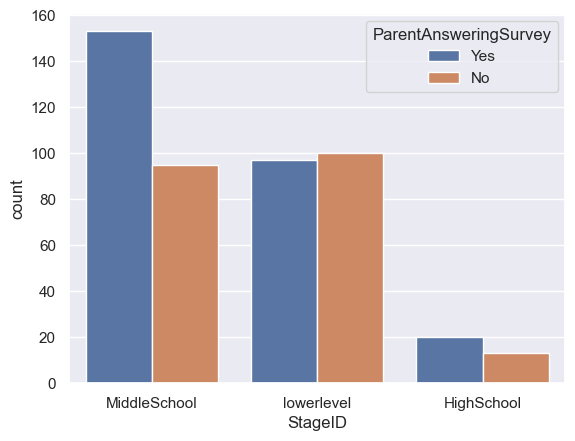

In [437]:
sns.countplot(x="StageID", hue="ParentAnsweringSurvey", data=df, order=df["StageID"].value_counts().index)
plt.show()
## Parents of lower level school students are taking active participation in suverys as compared to Middle and High school

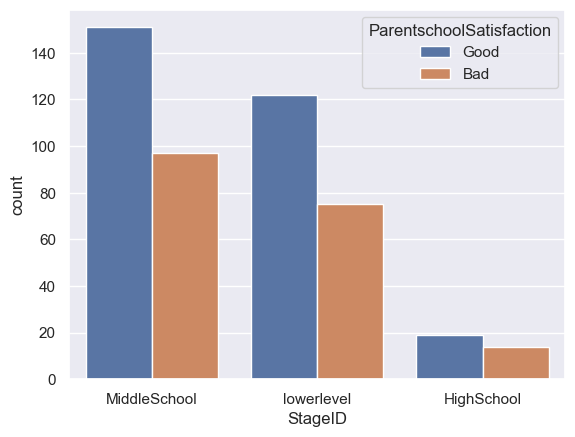

In [438]:
sns.countplot(x="StageID", hue="ParentschoolSatisfaction", data=df, order=df["StageID"].value_counts().index)
plt.show()
## No clear finding

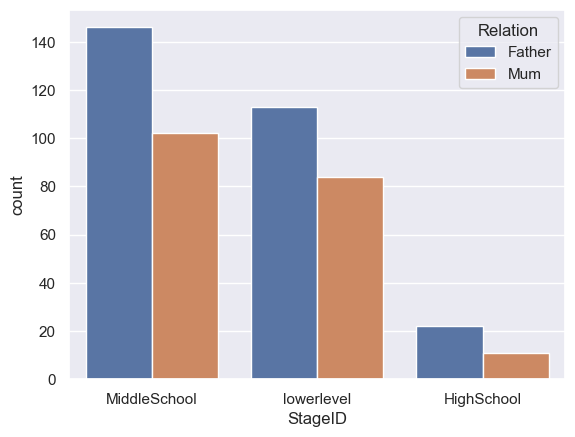

In [439]:
sns.countplot(x="StageID", hue="Relation", data=df, order=df["StageID"].value_counts().index)
plt.show()
## No clear finding

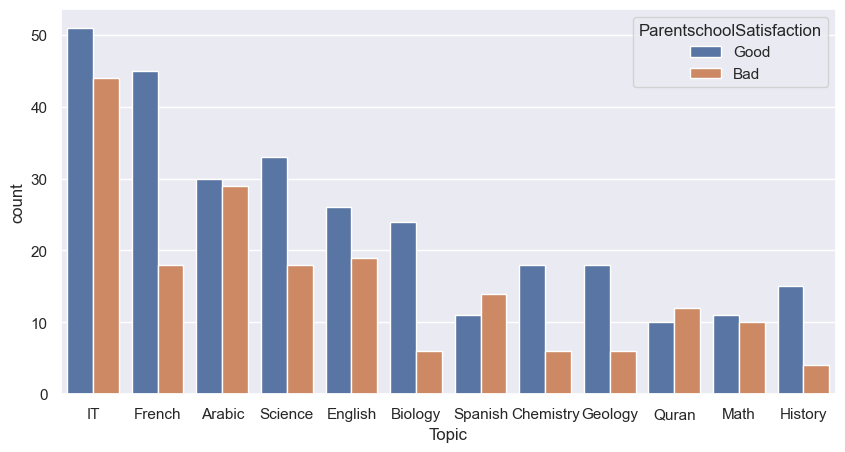

In [440]:
plt.figure(figsize=(10,5))
sns.countplot(x="Topic", hue="ParentschoolSatisfaction", data=df, order=df["Topic"].value_counts().index)
plt.show()
## Parents unsatisfaction level is high for these topics: Arabic, Spanish, Quran 

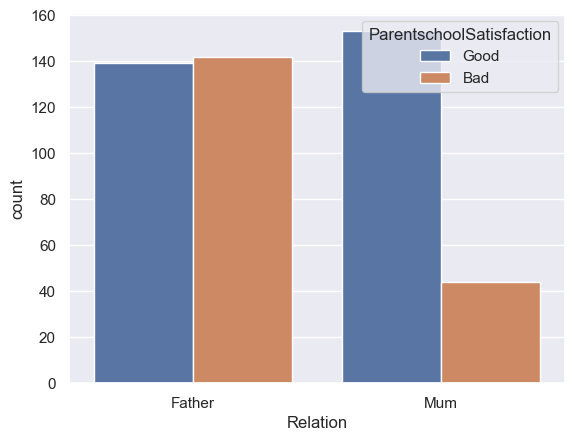

In [441]:
sns.countplot(x="Relation", hue="ParentschoolSatisfaction", data=df, order=df["Relation"].value_counts().index)
plt.show()
## 50% of fathers are unstatified with the school whereas 20% of mothers are unsatisfied.  

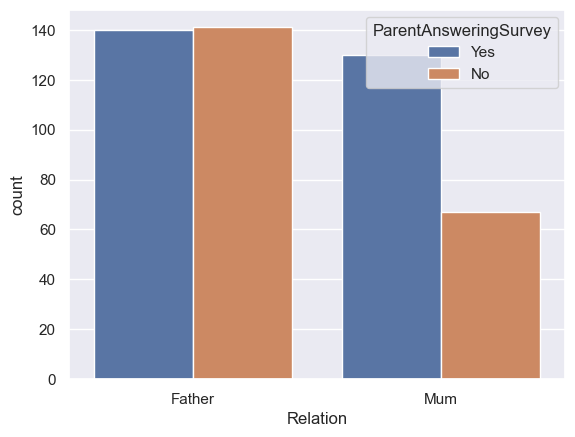

In [442]:
sns.countplot(x="Relation", hue="ParentAnsweringSurvey", data=df, order=df["Relation"].value_counts().index)
plt.show()
## It seems 50% of father's are answering surveys whereas only 33% of mothers are answering the surveys. So, it 
## seems fathers are participating more actively as compared to mothers

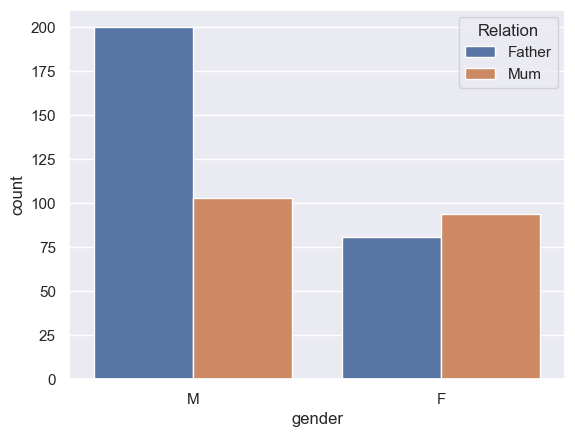

In [443]:
sns.countplot(x="gender", hue="Relation", data=df, order=df["gender"].value_counts().index)
plt.show()
## For male students, participation of father is higher whereas for females, participation of father and mother is 
## almost equal

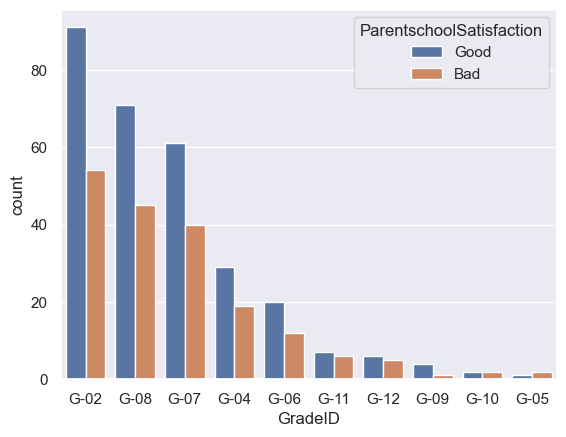

In [444]:
sns.countplot(x="GradeID", hue="ParentschoolSatisfaction", data=df, order=df["GradeID"].value_counts().index)
plt.show()

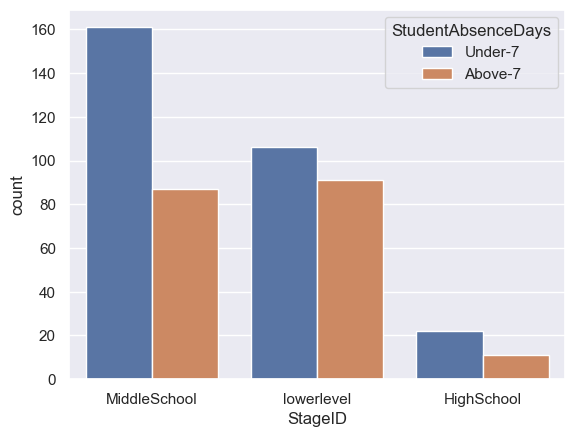

In [445]:
sns.countplot(x="StageID", hue="StudentAbsenceDays", data=df, order=df["StageID"].value_counts().index)
plt.show()

### 3. Visualize categorical variables with numerical variables and give conclusions?

In [446]:
df.sample(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
309,M,Palestine,Jordan,lowerlevel,G-04,B,Science,S,Mum,82,84,79,79,Yes,Good,Above-7,M
46,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,7,10,1,30,No,Bad,Above-7,L
454,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,45,87,57,80,Yes,Good,Under-7,M
419,M,Palestine,Jordan,MiddleSchool,G-07,B,Biology,S,Father,99,96,89,84,Yes,Good,Under-7,H
389,M,Jordan,SaudiArabia,lowerlevel,G-02,B,Arabic,S,Mum,5,0,1,8,No,Good,Above-7,L


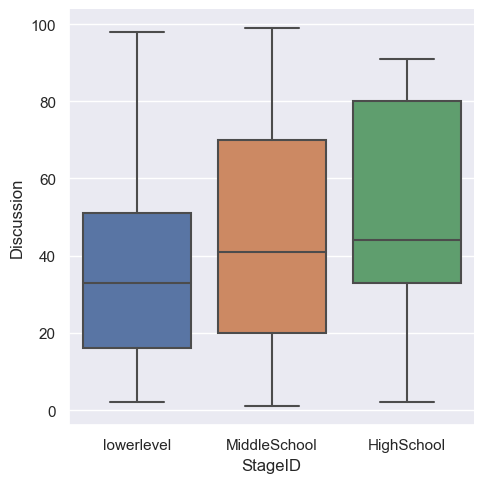

In [447]:
sns.catplot(x="StageID",y="Discussion", data=df, kind="box")
plt.show()
## As the stageID level increases, dicussion increases

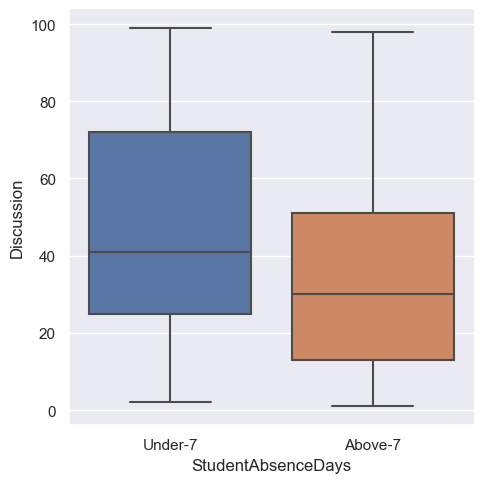

In [448]:
sns.catplot(x="StudentAbsenceDays",y="Discussion", data=df, kind="box")
plt.show()
## Students which are absent for less than 7 days has more dicussions as compared to students which are absent for
## more than 7 days

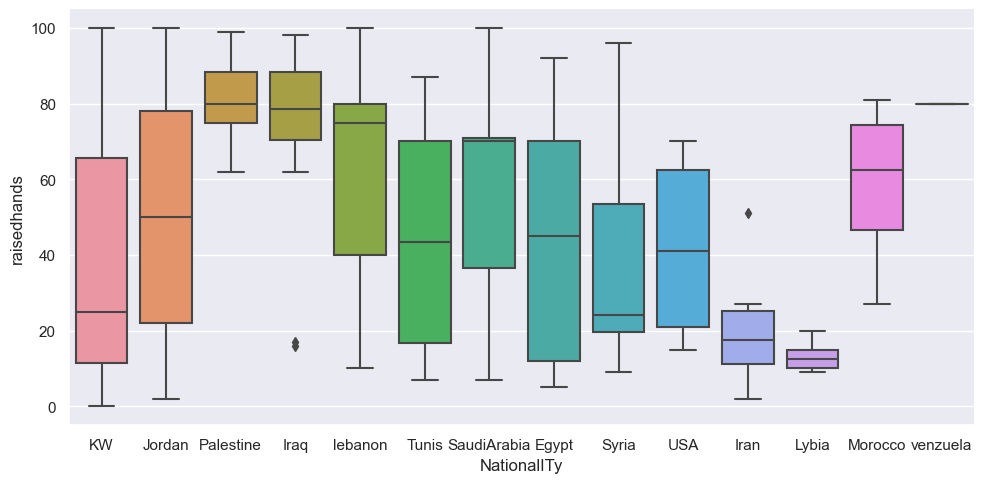

In [449]:
sns.catplot(x="NationalITy",y="raisedhands", data=df, kind="box", order=df["NationalITy"].value_counts().index, aspect
           =2)
plt.show()

## Students from Palestine and Iraq nationalities raised hands more as compared to other nationalities

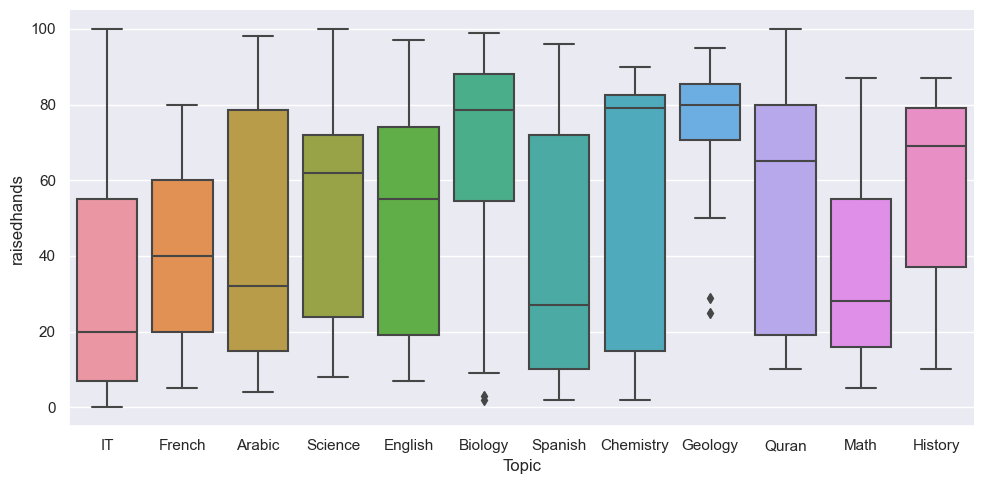

In [450]:
sns.catplot(x="Topic",y="raisedhands", data=df, kind="box", order=df["Topic"].value_counts().index, aspect
           =2)
plt.show()

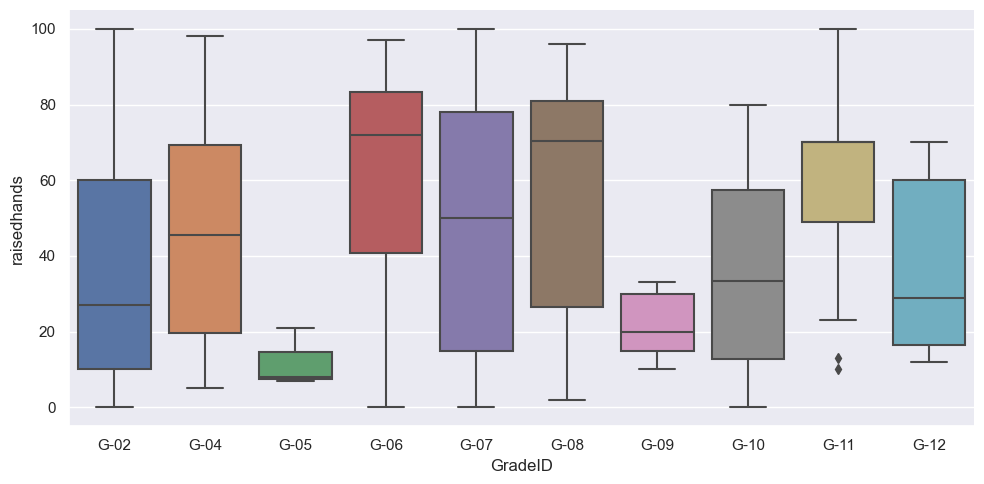

In [451]:
sns.catplot(x="GradeID",y="raisedhands", data=df.sort_values(by="GradeID"), kind="box", aspect=2)
plt.show()

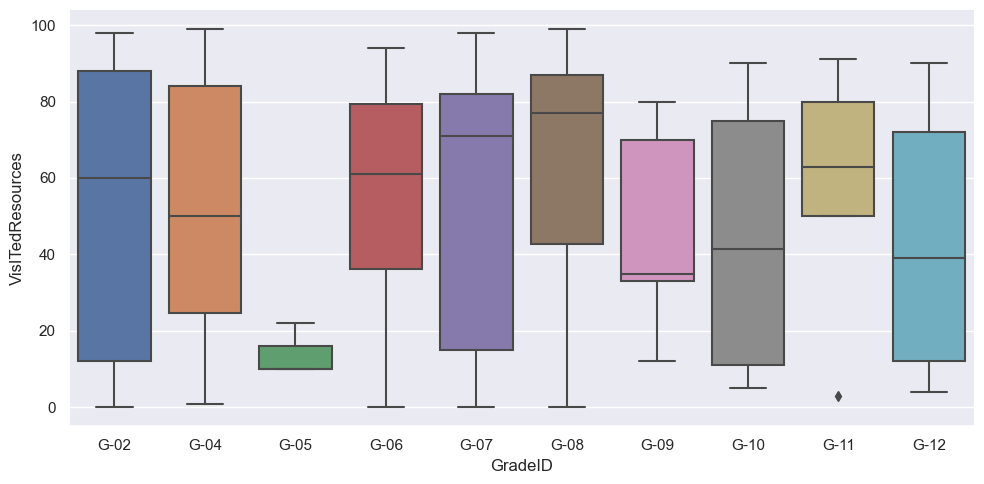

In [452]:
sns.catplot(x="GradeID",y="VisITedResources", data=df.sort_values(by="GradeID"), kind="box", aspect=2)
plt.show()

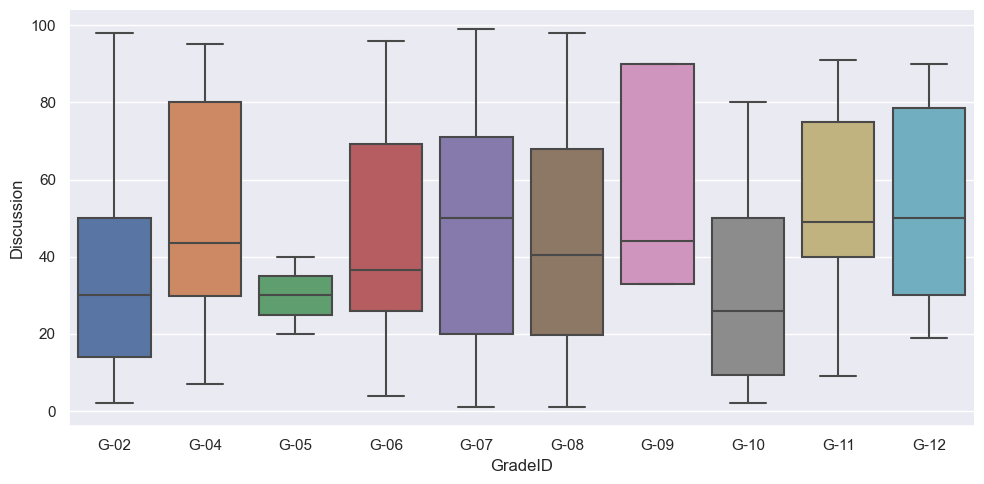

In [453]:
sns.catplot(x="GradeID",y="Discussion", data=df.sort_values(by="GradeID"), kind="box", aspect=2)
plt.show()

In [454]:
df[["Grade_st","Grade_nu"]]=df["GradeID"].str.split("-",expand=True)
df["Grade_nu"]=df["Grade_nu"].astype(int)

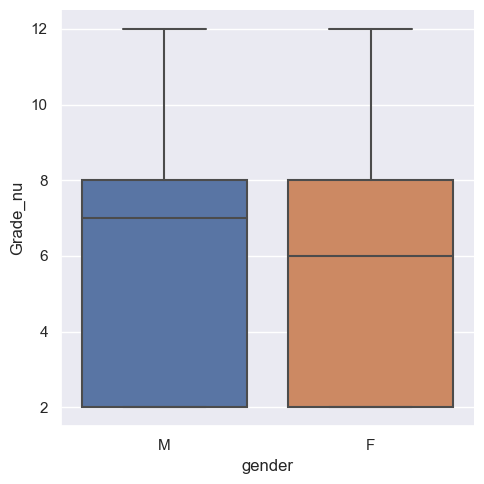

In [455]:
sns.catplot(x="gender",y="Grade_nu", data=df,kind="box")
plt.show()

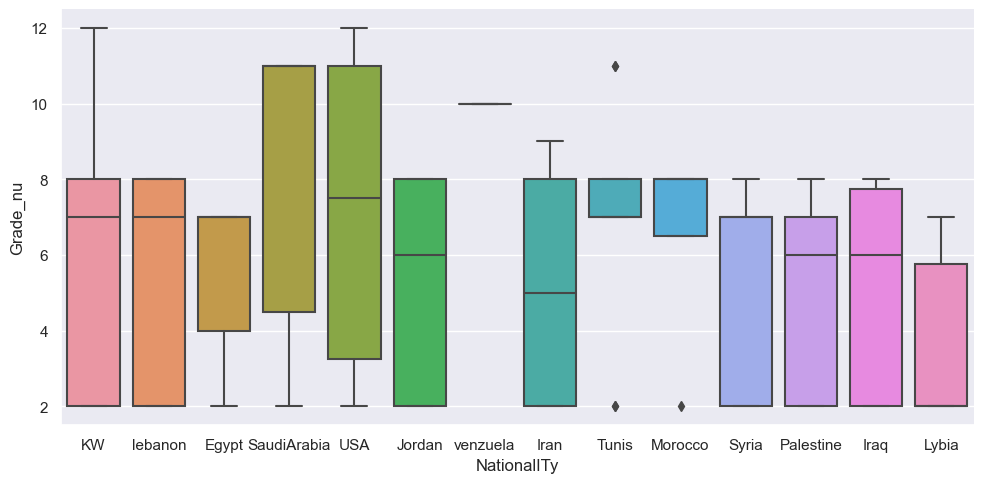

In [456]:
sns.catplot(x="NationalITy",y="Grade_nu", data=df,kind="box", aspect=2)
plt.show()
## Students from Saudi Arabia and USA have grades higher as compared to students from other countries. Here I've
## assumed the Grade-12 is highest grade whereas Grdae-1 is lowest grade

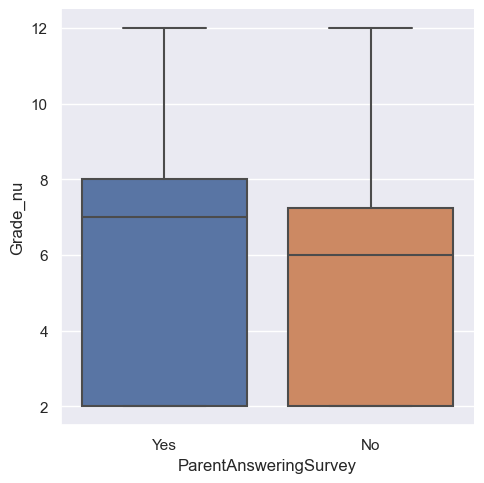

In [457]:
sns.catplot(x="ParentAnsweringSurvey",y="Grade_nu", data=df,kind="box")
plt.show()

### 4. From the above result, what are the factors that leads to get low grades of the students?

In [458]:
## I could analyse that only Nationality has some impact on gradeId.otherise could'nt any other major relationship of gradeID
## with any other column

### 5. Build classification model and present it's classification report ?

In [459]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Grade_st', 'Grade_nu'],
      dtype='object')

In [460]:
df.drop(["Grade_nu", "Grade_st"], axis=1,inplace=True)

In [461]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [462]:
df_cat=df.select_dtypes(include="object")

In [463]:
df_cat.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [464]:
## one hot encoding
df=pd.get_dummies(df, columns=['gender', 'NationalITy', 'PlaceofBirth', 'StageID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'])

In [465]:
df.dtypes

GradeID                          object
raisedhands                       int64
VisITedResources                  int64
AnnouncementsView                 int64
Discussion                        int64
gender_F                          uint8
gender_M                          uint8
NationalITy_Egypt                 uint8
NationalITy_Iran                  uint8
NationalITy_Iraq                  uint8
NationalITy_Jordan                uint8
NationalITy_KW                    uint8
NationalITy_Lybia                 uint8
NationalITy_Morocco               uint8
NationalITy_Palestine             uint8
NationalITy_SaudiArabia           uint8
NationalITy_Syria                 uint8
NationalITy_Tunis                 uint8
NationalITy_USA                   uint8
NationalITy_lebanon               uint8
NationalITy_venzuela              uint8
PlaceofBirth_Egypt                uint8
PlaceofBirth_Iran                 uint8
PlaceofBirth_Iraq                 uint8
PlaceofBirth_Jordan               uint8


In [466]:
X=df.drop("GradeID", axis=1)
Y=df[["GradeID"]]

## Approach 1

In [467]:
from sklearn.model_selection import train_test_split

In [468]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [469]:
from sklearn.linear_model import LogisticRegression

In [470]:
lreg=LogisticRegression()

In [471]:
lreg.fit(X_train,Y_train)

LogisticRegression()

In [472]:
lreg.score(X_train,Y_train)

0.7964071856287425

In [473]:
lreg.score(X_test,Y_test)

0.6736111111111112

In [474]:
predictions=lreg.predict(X_test)

In [475]:
sorted(df.GradeID.unique())

['G-02',
 'G-04',
 'G-05',
 'G-06',
 'G-07',
 'G-08',
 'G-09',
 'G-10',
 'G-11',
 'G-12']

In [476]:
predictions

array(['G-08', 'G-02', 'G-02', 'G-07', 'G-02', 'G-02', 'G-06', 'G-08',
       'G-02', 'G-07', 'G-02', 'G-08', 'G-04', 'G-08', 'G-02', 'G-08',
       'G-07', 'G-02', 'G-02', 'G-04', 'G-02', 'G-02', 'G-02', 'G-02',
       'G-02', 'G-02', 'G-07', 'G-02', 'G-06', 'G-08', 'G-08', 'G-08',
       'G-08', 'G-08', 'G-08', 'G-08', 'G-12', 'G-08', 'G-07', 'G-07',
       'G-07', 'G-08', 'G-02', 'G-08', 'G-07', 'G-02', 'G-07', 'G-02',
       'G-02', 'G-08', 'G-07', 'G-02', 'G-02', 'G-08', 'G-07', 'G-02',
       'G-08', 'G-04', 'G-08', 'G-08', 'G-07', 'G-02', 'G-02', 'G-08',
       'G-02', 'G-07', 'G-08', 'G-02', 'G-02', 'G-08', 'G-02', 'G-08',
       'G-08', 'G-02', 'G-08', 'G-07', 'G-08', 'G-04', 'G-07', 'G-08',
       'G-02', 'G-07', 'G-08', 'G-02', 'G-02', 'G-02', 'G-07', 'G-07',
       'G-07', 'G-02', 'G-02', 'G-07', 'G-02', 'G-08', 'G-04', 'G-02',
       'G-08', 'G-08', 'G-02', 'G-02', 'G-07', 'G-08', 'G-02', 'G-02',
       'G-06', 'G-02', 'G-02', 'G-07', 'G-08', 'G-07', 'G-02', 'G-07',
      

In [477]:
from sklearn import metrics

In [478]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

        G-02       0.66      0.95      0.78        43
        G-04       0.67      0.29      0.40        14
        G-05       0.00      0.00      0.00         3
        G-06       1.00      0.33      0.50         9
        G-07       0.68      0.68      0.68        31
        G-08       0.68      0.85      0.76        33
        G-09       0.00      0.00      0.00         3
        G-10       0.00      0.00      0.00         1
        G-11       0.00      0.00      0.00         6
        G-12       0.00      0.00      0.00         1

    accuracy                           0.67       144
   macro avg       0.37      0.31      0.31       144
weighted avg       0.63      0.67      0.62       144



In [479]:
metrics.accuracy_score(Y_test,predictions)

0.6736111111111112

In [480]:
cm=metrics.confusion_matrix(Y_test,predictions, labels=["G-02","G-04","G-05","G-06","G-07","G-08","G-09","G-10","G-11","G-12"])
df_cm=pd.DataFrame(cm,index=[i for i in ["G-02","G-04","G-05", "G-06","G-07","G-08","G-09","G-10","G-11","G-12"]], 
                   columns=[i for i in ["Predict G-02","Predict G-04","Predict G-05","Predict G-06","Predict G-07","Predict G-08","Predict G-09"
                                        ,"Predict G-10","Predict G-11","Predict G-12"]])

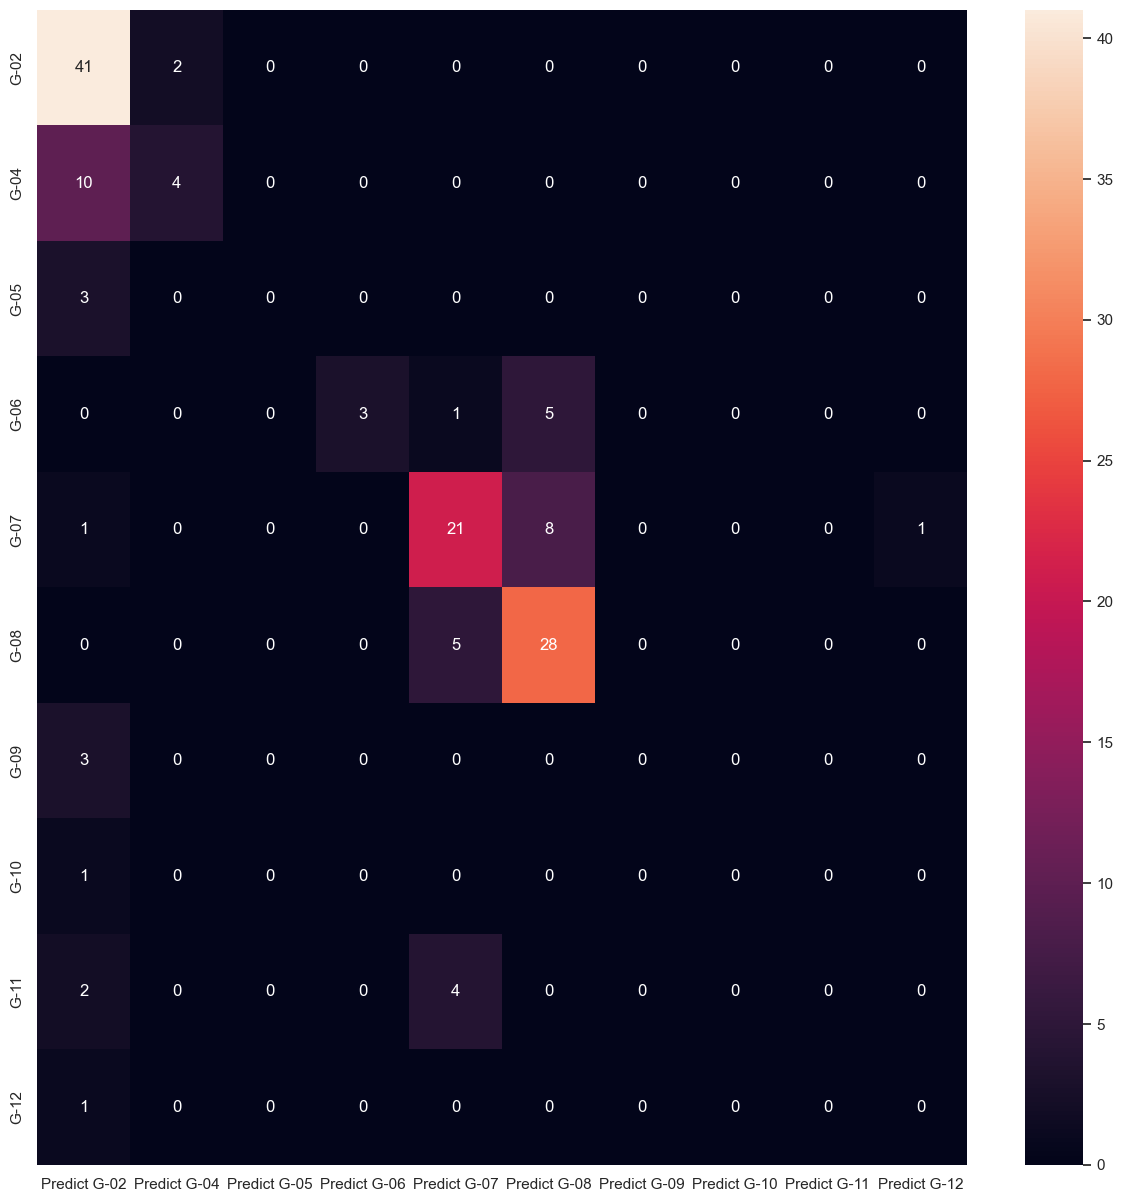

In [481]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cm,annot=True)
plt.show()

In [482]:
from sklearn.naive_bayes import GaussianNB

In [483]:
nb_model = GaussianNB()

In [484]:
nb_model.fit(X_train,Y_train)

GaussianNB()

In [485]:
nb_model.score(X_train,Y_train)

0.8293413173652695

In [486]:
nb_model.score(X_test,Y_test)

0.7430555555555556

In [487]:
predictions=nb_model.predict(X_test)

In [488]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

        G-02       1.00      0.65      0.79        43
        G-04       0.44      1.00      0.61        14
        G-05       0.00      0.00      0.00         3
        G-06       0.54      0.78      0.64         9
        G-07       0.82      0.74      0.78        31
        G-08       0.91      0.97      0.94        33
        G-09       0.00      0.00      0.00         3
        G-10       0.25      1.00      0.40         1
        G-11       1.00      0.17      0.29         6
        G-12       0.33      1.00      0.50         1

    accuracy                           0.74       144
   macro avg       0.53      0.63      0.49       144
weighted avg       0.81      0.74      0.74       144



## Approach 2

In [489]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [490]:
scaler=StandardScaler()

In [491]:
X_scaled=scaler.fit_transform(X)

In [492]:
X_scaled[0]

array([-1.03678501, -1.18103963, -1.35415579, -0.84843421, -0.75997221,
        0.75997221, -0.13852713, -0.1127469 , -0.21964884, -0.74293206,
        1.2924361 , -0.1127469 , -0.09186304, -0.24944383, -0.15347509,
       -0.12190979, -0.16047141, -0.1127469 , -0.19203217, -0.04578685,
       -0.13852713, -0.1127469 , -0.21964884, -0.75655034,  1.28668394,
       -0.1127469 , -0.09186304, -0.14617634, -0.18609684, -0.1127469 ,
       -0.13852713, -0.18609684, -0.20345598, -0.04578685, -0.27231839,
       -1.03839341,  1.19431819,  0.83729781, -0.73278748, -0.25877458,
       -0.37524853, -0.25877458, -0.2299205 , -0.32237571, -0.38962447,
       -0.2299205 , -0.20345598,  2.00787922, -0.21436385, -0.21964884,
       -0.34559794, -0.23492049,  0.97929382, -0.97929382,  0.83729781,
       -0.83729781, -0.87770745,  0.87770745, -0.79811422,  0.79811422,
       -0.80868983,  0.80868983, -0.65009157, -0.59506945,  1.12490126])

In [493]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y, test_size=0.3, random_state=42)

In [494]:
new_nb_model=GaussianNB()

In [495]:
new_nb_model.fit(x_train,y_train)

GaussianNB()

In [496]:
new_nb_model.score(x_train,y_train)

0.8143712574850299

In [497]:
new_nb_model.score(x_test,y_test)

0.7291666666666666

In [498]:
new_lrg=LogisticRegression()

In [499]:
new_lrg.fit(x_train,y_train)

LogisticRegression()

In [500]:
new_lrg.score(x_train,y_train)

0.9880239520958084

In [501]:
new_lrg.score(x_test,y_test)

0.8888888888888888

In [502]:
predict_new=new_lrg.predict(x_test)

In [503]:
print(metrics.classification_report(y_test,predict_new))

              precision    recall  f1-score   support

        G-02       0.98      1.00      0.99        43
        G-04       0.82      1.00      0.90        14
        G-05       0.00      0.00      0.00         3
        G-06       0.83      0.56      0.67         9
        G-07       0.83      0.94      0.88        31
        G-08       0.97      0.94      0.95        33
        G-09       0.00      0.00      0.00         3
        G-10       0.25      1.00      0.40         1
        G-11       1.00      0.67      0.80         6
        G-12       0.50      1.00      0.67         1

    accuracy                           0.89       144
   macro avg       0.62      0.71      0.63       144
weighted avg       0.87      0.89      0.87       144



In [504]:
predictions

array(['G-08', 'G-04', 'G-02', 'G-07', 'G-12', 'G-04', 'G-06', 'G-08',
       'G-04', 'G-07', 'G-02', 'G-08', 'G-04', 'G-08', 'G-04', 'G-08',
       'G-08', 'G-04', 'G-07', 'G-02', 'G-02', 'G-04', 'G-02', 'G-04',
       'G-04', 'G-02', 'G-07', 'G-02', 'G-06', 'G-08', 'G-06', 'G-08',
       'G-08', 'G-08', 'G-07', 'G-08', 'G-06', 'G-08', 'G-07', 'G-07',
       'G-08', 'G-07', 'G-02', 'G-08', 'G-08', 'G-04', 'G-07', 'G-04',
       'G-04', 'G-06', 'G-07', 'G-10', 'G-02', 'G-08', 'G-08', 'G-02',
       'G-06', 'G-04', 'G-08', 'G-08', 'G-12', 'G-10', 'G-10', 'G-06',
       'G-08', 'G-08', 'G-06', 'G-04', 'G-02', 'G-07', 'G-04', 'G-08',
       'G-08', 'G-02', 'G-08', 'G-06', 'G-08', 'G-04', 'G-07', 'G-07',
       'G-02', 'G-07', 'G-08', 'G-02', 'G-02', 'G-04', 'G-07', 'G-07',
       'G-06', 'G-04', 'G-02', 'G-07', 'G-10', 'G-07', 'G-04', 'G-04',
       'G-08', 'G-08', 'G-02', 'G-04', 'G-06', 'G-08', 'G-04', 'G-02',
       'G-06', 'G-02', 'G-02', 'G-11', 'G-07', 'G-07', 'G-02', 'G-07',
      